# Combine Features by PCA

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from load_data import *

In [3]:
price, listings, reviews = var_tests()

------------------------------
Selecting Features data...
------------------------------
------------------------------
Loading data...
------------------------------
Data loaded.


d:\Uni\WiSe21-22\Statistical and Deep Learning\DubAir\DubAir\load_data.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings["host_location_country"][fil] = str(i)
C:\Users\49173\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
d:\Uni\WiSe21-22\Statistical and Deep Learning\DubAir\DubAir\load_data.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings["host_location_country"][fil] = str(country_list[i])
d:\Uni\WiSe21-22\Statistical and Deep L

Data cleansed.
Imputation done. No NaN's are left in the data.
Further Modifications are done.
Text and Open Street Data generated.
Image data loaded.
Due to insignificant t-tests we dropped:
['Bathtub', 'Bed linens', 'Breakfast', 'Cleaning before checkout', 'Dishwasher', 'Elevator', 'Hair dryer', 'Indoor fireplace', 'Private entrance', 'Security cameras on property', 'Single level home', 'Stoves_available', 'Refridgerator_available', 'Body_soap_available', 'Garden_backyard_available', 'Children_Entertainment', 'Workspace', 'Gym_available', 'Coffee_machine_available', 'Dryer_available', 'Washer_available', 'Hot_tub_available', 'Pool_available', 'Wifi_available', 'AC_available', 'heating_available', 'Kitchen_available', 'Safe_available', 'Water_location', 'sound_system_available', 'TV_available', 'Outdoor_stuff', 'Game_consoles', 'Baby_friendly', 'Special_stuff', 'neighbourhood_cleansed_Dn Laoghaire-Rathdown', 'property_type_Entire guesthouse', 'property_type_Entire loft', 'property_typ

## City Life

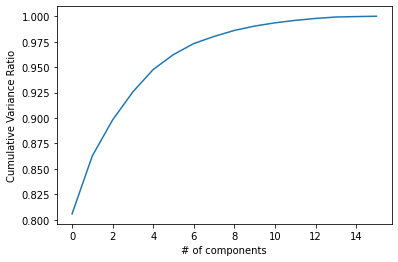

<Figure size 2880x2880 with 0 Axes>

In [4]:
# city_life = ["cafes", "bars", "restaurants", "fast_foods", "taxi", "library", "casinos", 
#             "university", "theatres_artscentre", "bicycle_rentals"]

city_life = ["nightclubs", "sex_amenities", "bicycle_rentals", "casinos", "university", 
             "theatres_artscentre", "library", "taxi", "fast_foods", "restaurants", "bars",
             "cafes", "malls", "cinemas", "supermarkets", "bus_train_tram_station"]

scaler = StandardScaler()
scaler.fit(listings[city_life])
city_life_df = scaler.transform(listings[city_life])

pca = PCA().fit(city_life_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(40,40))
plt.show()

## Travel & Touristic 

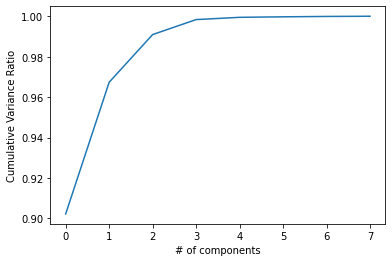

<Figure size 720x720 with 0 Axes>

In [5]:
travel_touristic = ["neighbourhood_cleansed_Dublin City", "in_city", "nearest_sight", "mean_dist_sight", "2nd_nearest_sight",
                    "3rd_nearest_sight", "nearest_travel_poss", "mean_dist_travel"]

scaler = StandardScaler()                   
scaler.fit(listings[travel_touristic])
travel_touristic_df = scaler.transform(listings[travel_touristic])

pca = PCA().fit(travel_touristic_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

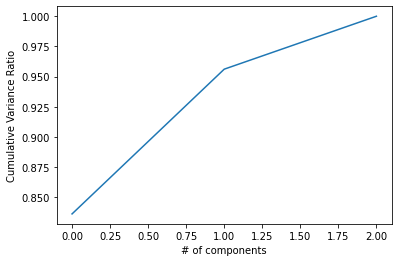

<Figure size 720x720 with 0 Axes>

In [6]:
acco = ["bedroom_number_1", "beds", "accommodates"]

scaler = StandardScaler()                   
scaler.fit(listings[acco])
accommodation_size_df = scaler.transform(listings[acco])

pca = PCA().fit(accommodation_size_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

In [7]:
PCA(n_components = 3).fit_transform(accommodation_size_df)

array([[-0.59240786,  0.50178912, -0.36293839],
       [-1.02648825,  0.11915674,  0.10547145],
       [-1.33538774, -0.00999462, -0.28628953],
       ...,
       [-1.02648825,  0.11915674,  0.10547145],
       [-1.02648825,  0.11915674,  0.10547145],
       [ 2.07436464, -0.24110895, -0.86494624]])

In [8]:
#pca.singular_values_ # eigenvalues
pca.components_

array([[-0.54839619,  0.58307014,  0.59940874],
       [ 0.82038661,  0.51396359,  0.25061374],
       [ 0.16194887, -0.62918252,  0.7601986 ]])

In [9]:
pca.components_[0]

array([-0.54839619,  0.58307014,  0.59940874])

In [10]:
accommodation_size_df[0, :]

array([ 0.67775782,  0.14084049, -0.50524446])

## Accommodation Size

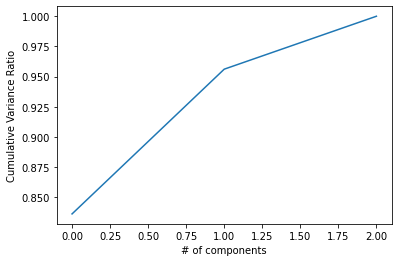

<Figure size 720x720 with 0 Axes>

In [11]:
acco = ["bedroom_number_1", "accommodates", "beds"]

scaler = StandardScaler()                   
scaler.fit(listings[acco])
accommodation_size_df = scaler.transform(listings[acco])

pca = PCA().fit(accommodation_size_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

## Host Listings count

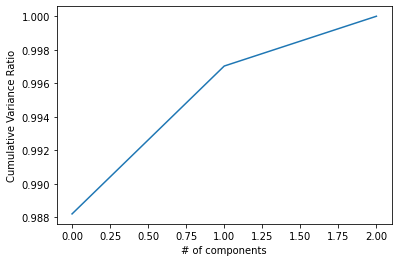

<Figure size 720x720 with 0 Axes>

In [12]:
host_listings = ["calculated_host_listings_count", "host_listings_count", "calculated_host_listings_count_private_rooms"]

scaler = StandardScaler()                   
scaler.fit(listings[host_listings])
host_listings_df = scaler.transform(listings[host_listings])

pca = PCA().fit(host_listings_df)
r_cs = np.cumsum(pca.explained_variance_ratio_)
#r_cs = np.round(r_cs)
plt.plot(r_cs)
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

## Minimum nights

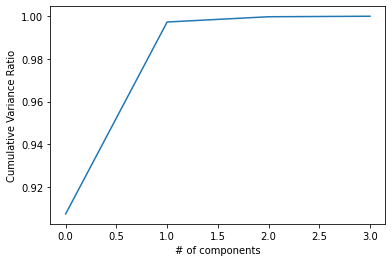

<Figure size 720x720 with 0 Axes>

In [13]:
min_nights = ["minimum_nights", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_nights_avg_ntm"]

scaler = StandardScaler()                   
scaler.fit(listings[min_nights])
min_nights_df = scaler.transform(listings[min_nights])

pca = PCA().fit(min_nights_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

## Availability

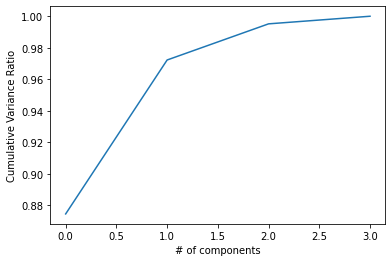

<Figure size 720x720 with 0 Axes>

In [14]:
avail = ["availability_365", "availability_30", "availability_60", "availability_90"]

scaler = StandardScaler()                   
scaler.fit(listings[avail])
avail_df = scaler.transform(listings[avail])

pca = PCA().fit(avail_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

## Review total

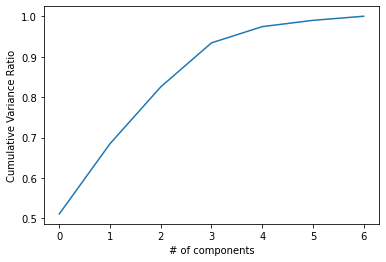

<Figure size 720x720 with 0 Axes>

In [23]:
review_total = ["review_scores_rating", "mean_compound", "most_pos_compound", "mean_positivity",
                "mean_neutrality", "mean_negativity", "most_neg_compound"]

scaler = StandardScaler()                   
scaler.fit(listings[review_total])
review_total_df = scaler.transform(listings[review_total])

pca = PCA().fit(review_total_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

In [24]:
np.cumsum(pca.explained_variance_ratio_)

array([0.51097204, 0.68465616, 0.82519116, 0.93412663, 0.97427967,
       0.98982483, 1.        ])

## Review Scores

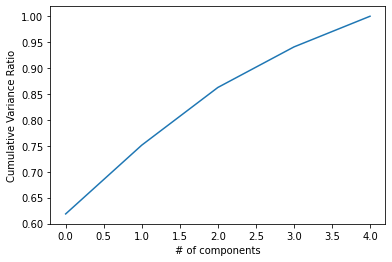

<Figure size 720x720 with 0 Axes>

In [25]:
review_scores = ["review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_cleanliness",
                 "review_scores_value"]

scaler = StandardScaler()                   
scaler.fit(listings[review_scores])
review_scores_df = scaler.transform(listings[review_scores])

pca = PCA().fit(review_scores_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

In [27]:
# not so nice

## Maximum Nights

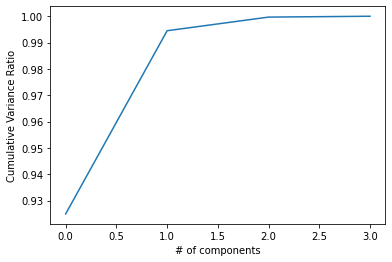

<Figure size 720x720 with 0 Axes>

In [28]:
max_nights = ["maximum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "maximum_nights_avg_ntm"]

scaler = StandardScaler()                   
scaler.fit(listings[max_nights])
max_nights_df = scaler.transform(listings[max_nights])

pca = PCA().fit(max_nights_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

# Number of reviews on time

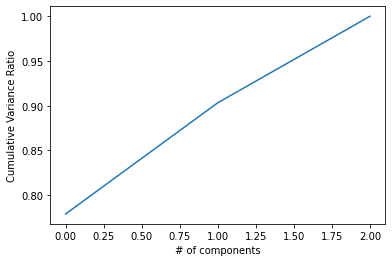

<Figure size 720x720 with 0 Axes>

In [26]:
review_amount = ["number_of_reviews_l30d", "number_of_reviews_ltm", "reviews_per_month"]

scaler = StandardScaler()                   
scaler.fit(listings[review_amount])
review_amount_df = scaler.transform(listings[review_amount])

pca = PCA().fit(review_amount_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()